In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

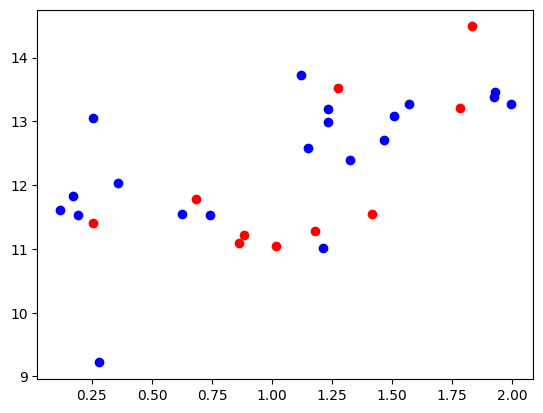

In [2]:
# create data for regression

np.random.seed(2021)

X_train_hw = 2 * np.random.rand(20, 1)
y_train_hw = 10 + 2 * X_train_hw + np.random.randn(20, 1)

X_test_hw = 2 * np.random.rand(10, 1)
y_test_hw = 10 + 2 * X_test_hw + np.random.randn(10, 1)

plt.scatter(X_train_hw, y_train_hw, color='blue')
plt.scatter(X_test_hw, y_test_hw, color='red')

In [3]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_hw, y_train_hw)
lin_reg.coef_[0][0]

1.108365151244497

In [4]:
intercept = lin_reg.intercept_[0]

betas = np.arange(-1, 5.0, 0.05)
betas = [np.round(beta,2) for beta in betas]

lambdas = np.arange(0, 150, 20)

λ=0: optimal beta = 1.1, train MSE = 0.6671, test MSE = 0.9398
λ=20: optimal beta = 0.65, train MSE = 0.9655, test MSE = 0.9492
λ=40: optimal beta = 0.45, train MSE = 1.2828, test MSE = 1.1438
λ=60: optimal beta = 0.35, train MSE = 1.4841, test MSE = 1.2850
λ=80: optimal beta = 0.3, train MSE = 1.5954, test MSE = 1.3666
λ=100: optimal beta = 0.25, train MSE = 1.7138, test MSE = 1.4555
λ=120: optimal beta = 0.2, train MSE = 1.8393, test MSE = 1.5518
λ=140: optimal beta = 0.2, train MSE = 1.8393, test MSE = 1.5518


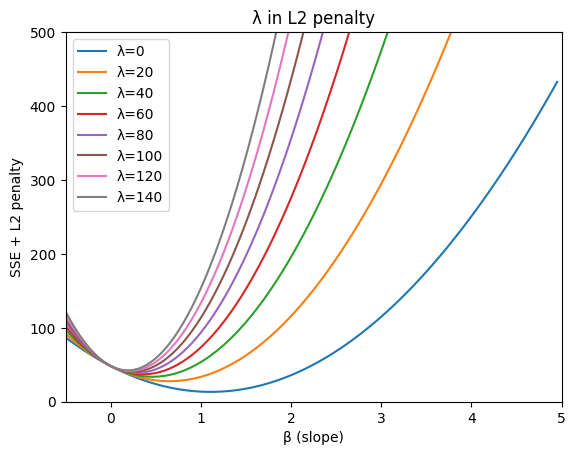

In [6]:
## RIDGE L2 ##

for lamb in lambdas:

    losses = []

    for beta in betas:

        ## calculate predictions of training data
        y_pred = intercept + beta*X_train_hw
        ## calculate sum of squared errors (sse)
        sse = np.sum((y_train_hw - y_pred)**2)
        ## add L2 penalty
        l2_loss = sse + lamb*(beta)**2
        ## save L2 loss for later (append to losses list)
        losses.append(l2_loss)

    plt.plot(betas, losses, label=f"λ={lamb}")

    plt.legend()
    plt.title("λ in L2 penalty")

    plt.ylim(0,500)
    plt.xlim(-0.5,5)

    plt.ylabel("SSE + L2 penalty")
    plt.xlabel("β (slope)")

    ## find optimal value of beta for a given lambda
    min_idx = losses.index(min(losses))
    optim_beta = betas[min_idx]

    # check train MSE for the regression with optimal value of beta
    y_train_hw_pred = intercept + optim_beta*X_train_hw
    sse_train_hw = mean_squared_error(y_train_hw, y_train_hw_pred)

    # check test MSE for the regression with optimal value of beta
    y_test_hw_pred = intercept + optim_beta*X_test_hw
    sse_test_hw = mean_squared_error(y_test_hw, y_test_hw_pred)

    print(f"λ={lamb}: optimal beta = {optim_beta}, train MSE = {sse_train_hw:.4f}, test MSE = {sse_test_hw:.4f}")

λ=0: optimal beta = 1.1, train MSE = 0.6671, test MSE = 0.9398
λ=20: optimal beta = 0.75, train MSE = 0.8494, test MSE = 0.8959
λ=40: optimal beta = 0.4, train MSE = 1.3799, test MSE = 1.2107
λ=60: optimal beta = 0.05, train MSE = 2.2585, test MSE = 1.8844
λ=80: optimal beta = 0.0, train MSE = 2.4124, test MSE = 2.0099
λ=100: optimal beta = 0.0, train MSE = 2.4124, test MSE = 2.0099
λ=120: optimal beta = 0.0, train MSE = 2.4124, test MSE = 2.0099
λ=140: optimal beta = 0.0, train MSE = 2.4124, test MSE = 2.0099


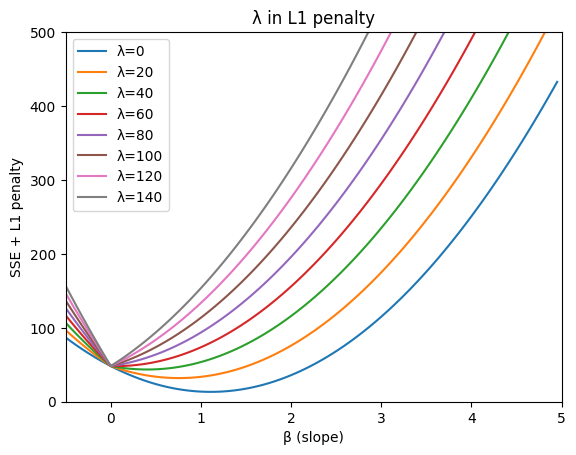

In [5]:
## LASSO L1 ##

for lamb in lambdas:

    losses = []

    for beta in betas:

        y_pred = intercept + beta*X_train_hw
        sse = np.sum((y_train_hw - y_pred)**2)
        l2_loss = sse + lamb*abs(beta)
        losses.append(l2_loss)

    plt.plot(betas, losses, label=f"λ={lamb}")

    plt.legend()
    plt.title("λ in L1 penalty")

    plt.ylim(0,500)
    plt.xlim(-0.5,5)

    plt.ylabel("SSE + L1 penalty")
    plt.xlabel("β (slope)")

    min_idx = losses.index(min(losses))
    optim_beta = betas[min_idx]

    y_train_hw_pred = intercept + optim_beta*X_train_hw
    sse_train_hw = mean_squared_error(y_train_hw, y_train_hw_pred)

    y_test_hw_pred = intercept + optim_beta*X_test_hw
    sse_test_hw = mean_squared_error(y_test_hw, y_test_hw_pred)

    print(f"λ={lamb}: optimal beta = {optim_beta}, train MSE = {sse_train_hw:.4f}, test MSE = {sse_test_hw:.4f}")